### Corona Virüs (COVID-19) Veri Görselleştirme

Veriler https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv sitesinden alınmıştır.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("data/corona.csv")

In [3]:
df=data.copy()

In [4]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7313 entries, 0 to 7312
Data columns (total 8 columns):
SNo                7313 non-null int64
ObservationDate    7313 non-null object
Province/State     4223 non-null object
Country/Region     7313 non-null object
Last Update        7313 non-null object
Confirmed          7313 non-null float64
Deaths             7313 non-null float64
Recovered          7313 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 457.2+ KB


In [6]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [7]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [8]:
df.drop(["SNo","Last Update"],axis=1,inplace=True)

In [9]:
df.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [10]:
df.columns=["Tarih","Şehir","Ülke","Bağımlı","Ölen","İyileşen"]

In [11]:
df.head()

,Tarih,Şehir,Ülke,Bağımlı,Ölen,İyileşen
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [12]:
df_mart=df[df["Tarih"]>="03/01/2020"]

In [13]:
df_mart.index=df_mart["Tarih"]

In [14]:
df_mart.index=pd.DatetimeIndex(df_mart.index)

In [15]:
df_mart.head()

,Tarih,Şehir,Ülke,Bağımlı,Ölen,İyileşen
Tarih,,,,,,
2020-03-01,03/01/2020,Hubei,Mainland China,66907.0,2761.0,31536.0
2020-03-01,03/01/2020,NaN,South Korea,3736.0,17.0,30.0
2020-03-01,03/01/2020,NaN,Italy,1694.0,34.0,83.0
2020-03-01,03/01/2020,Guangdong,Mainland China,1349.0,7.0,1016.0
2020-03-01,03/01/2020,Henan,Mainland China,1272.0,22.0,1198.0


In [16]:
sns.set(rc={"figure.figsize":(16,7)},style="whitegrid")

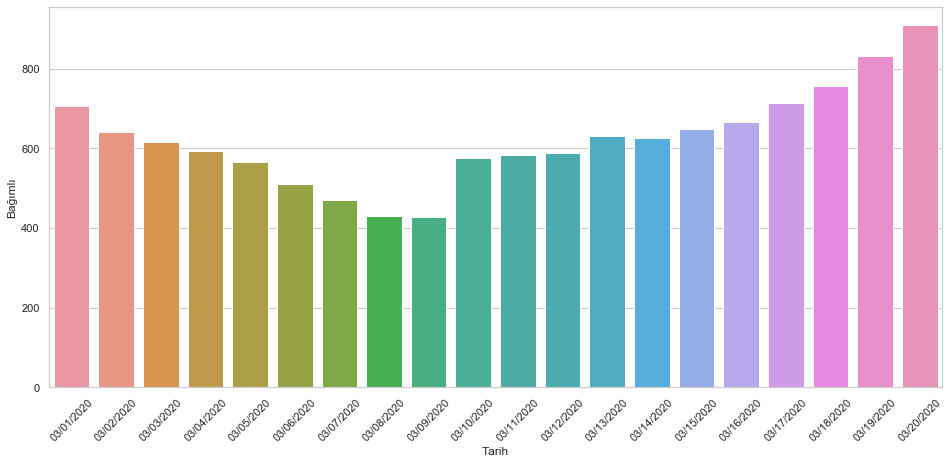

In [17]:
a=sns.barplot(data=df_mart,x="Tarih",y="Bağımlı",ci=None)
a.set_xticklabels(a.get_xticklabels(), rotation=45);

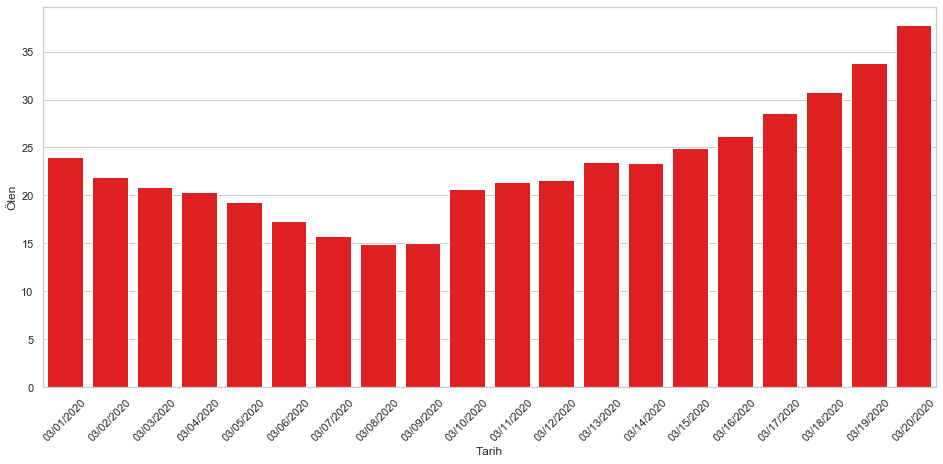

In [18]:
a=sns.barplot(data=df_mart,x="Tarih",y="Ölen",ci=None,color="red")
a.set_xticklabels(a.get_xticklabels(), rotation=45);

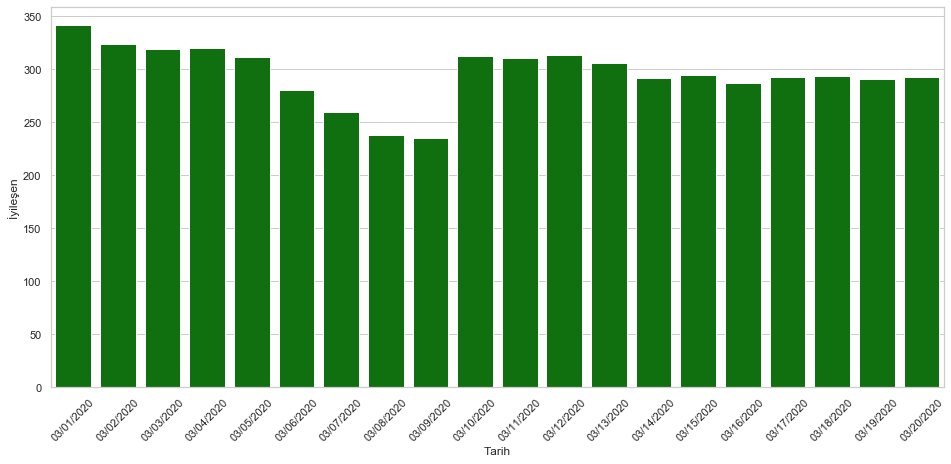

In [19]:
a=sns.barplot(data=df_mart,x="Tarih",y="İyileşen",ci=None,color="green")
a.set_xticklabels(a.get_xticklabels(), rotation=45);

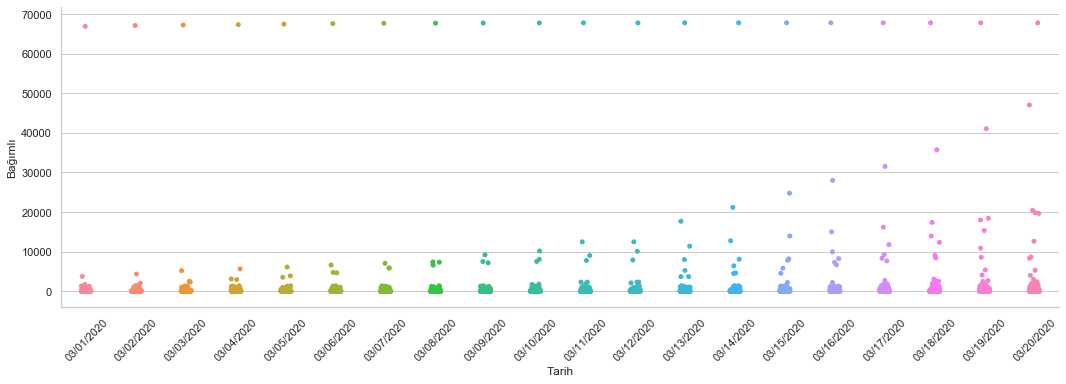

In [20]:
a=sns.catplot(x="Tarih",y="Bağımlı",data=df_mart,aspect=3)
a.set_xticklabels(rotation=45);

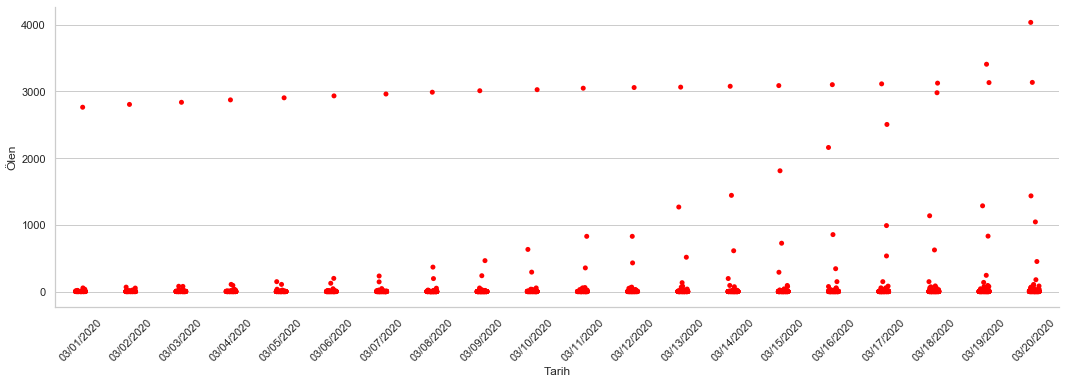

In [21]:
a=sns.catplot(x="Tarih",y="Ölen",data=df_mart,aspect=3,color="red")
a.set_xticklabels(rotation=45);

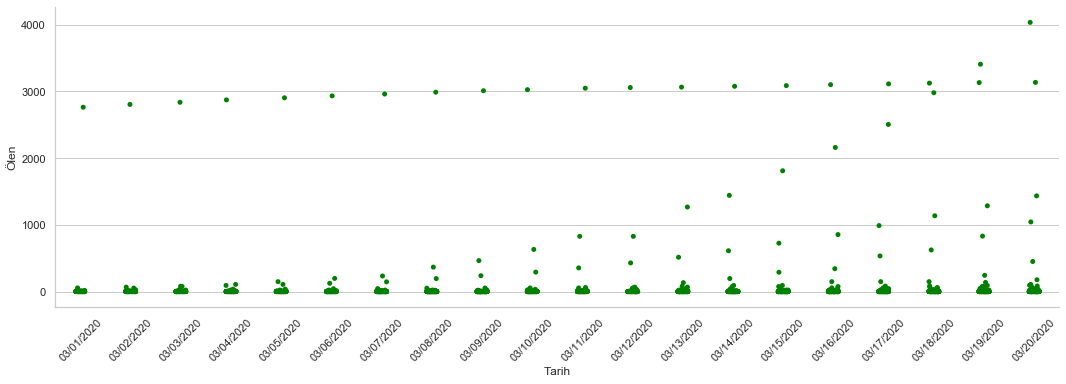

In [22]:
a=sns.catplot(x="Tarih",y="Ölen",data=df_mart,aspect=3,color="green")
a.set_xticklabels(rotation=45);

In [23]:
df_cin=df_mart[df_mart["Ülke"]=="Mainland China"]
df_fransa=df_mart[df_mart["Ülke"]=="France"]
df_italya=df_mart[df_mart["Ülke"]=="Italy"]
df_turkiye=df_mart[df_mart["Ülke"]=="Turkey"]

In [27]:
df_ulkeler=pd.concat([df_cin,df_fransa,df_italya,df_turkiye])

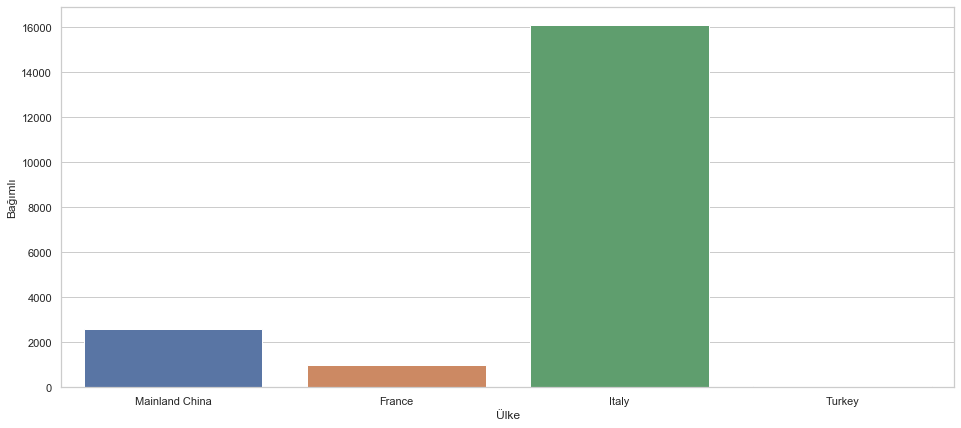

In [28]:
sns.barplot(x="Ülke",y="Bağımlı",data=df_ulkeler,ci=None)

[(0, 100)]

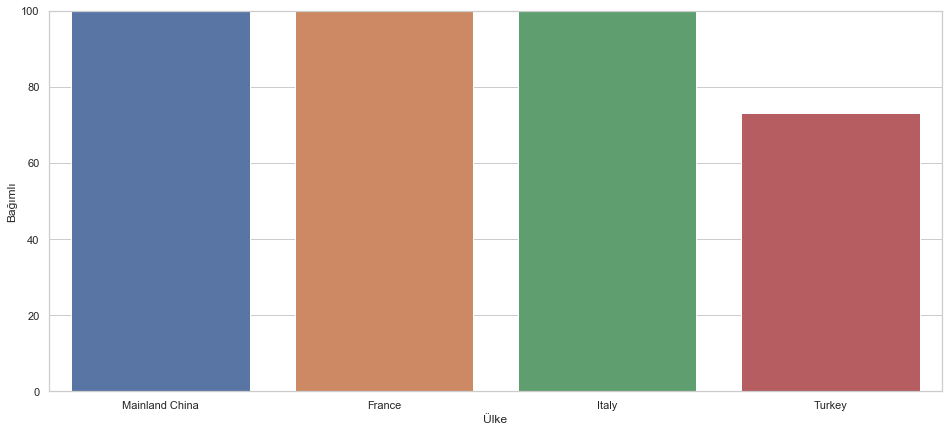

In [29]:
sns.barplot(x="Ülke",y="Bağımlı",data=df_ulkeler,ci=None).set(ylim=(0,100))

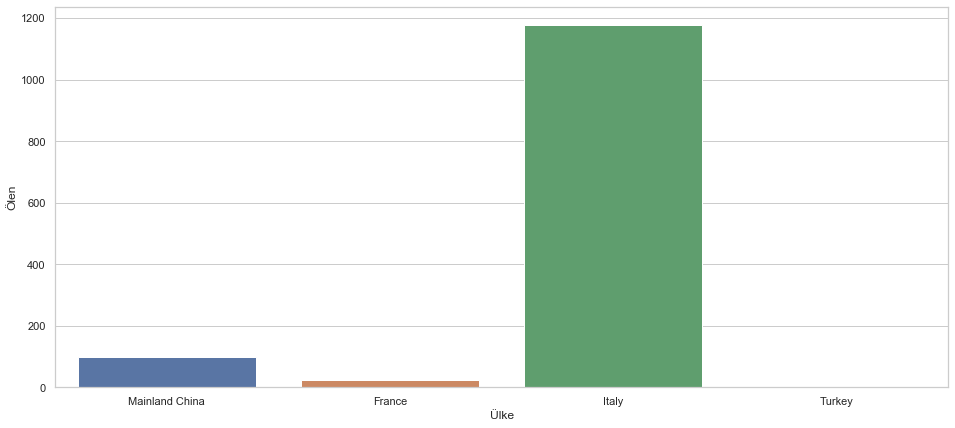

In [30]:
sns.barplot(x="Ülke",y="Ölen",data=df_ulkeler,ci=None)

[(0, 50)]

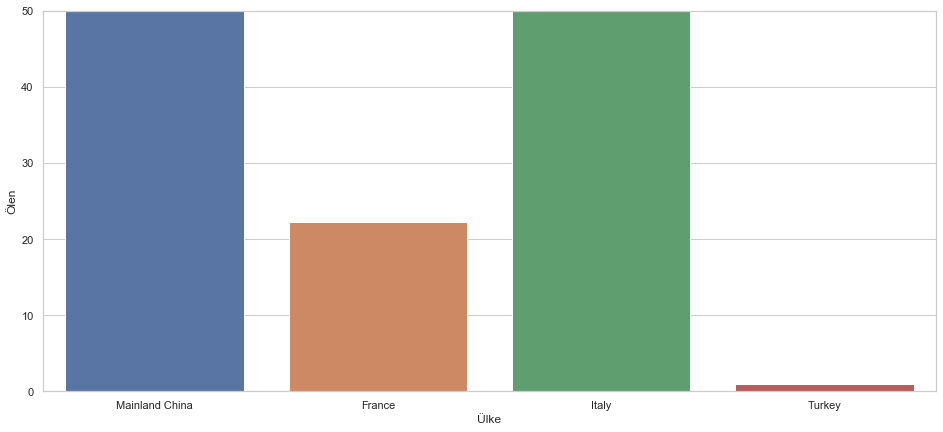

In [31]:
sns.barplot(x="Ülke",y="Ölen",data=df_ulkeler,ci=None).set(ylim=(0,50))

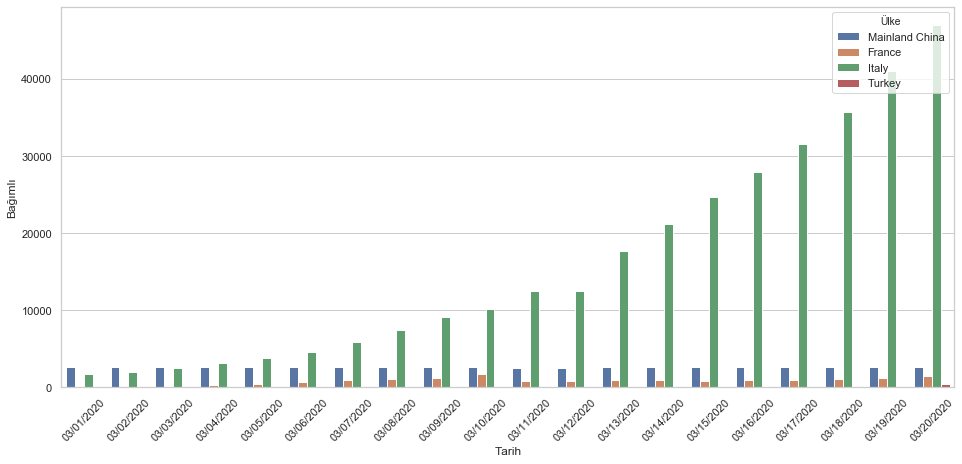

In [32]:
a=sns.barplot(x="Tarih",y="Bağımlı",hue="Ülke",data=df_ulkeler,ci=None)
a.set_xticklabels(a.get_xticklabels(), rotation=45);

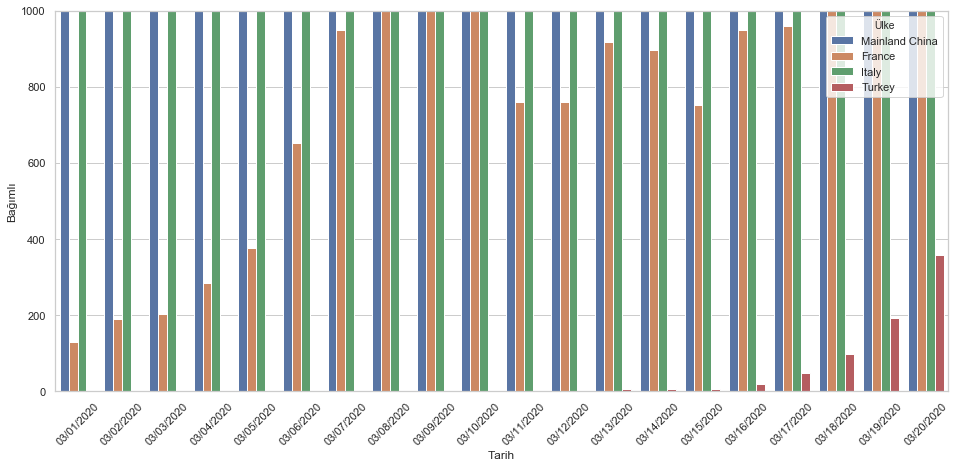

In [33]:
a=sns.barplot(x="Tarih",y="Bağımlı",hue="Ülke",data=df_ulkeler,ci=None)
a.set(ylim=(0,1000))
a.set_xticklabels(a.get_xticklabels(), rotation=45);

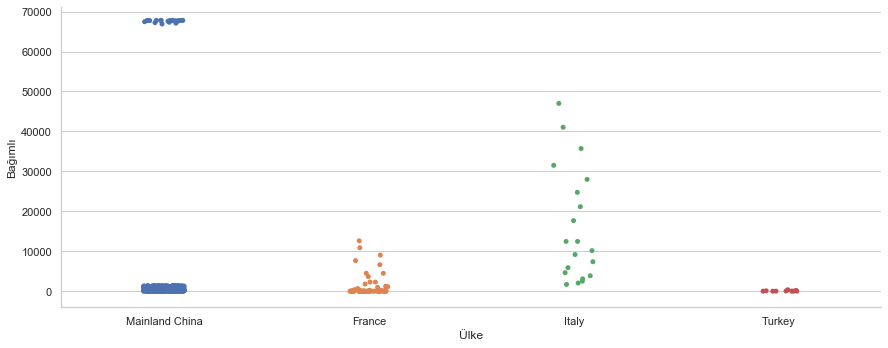

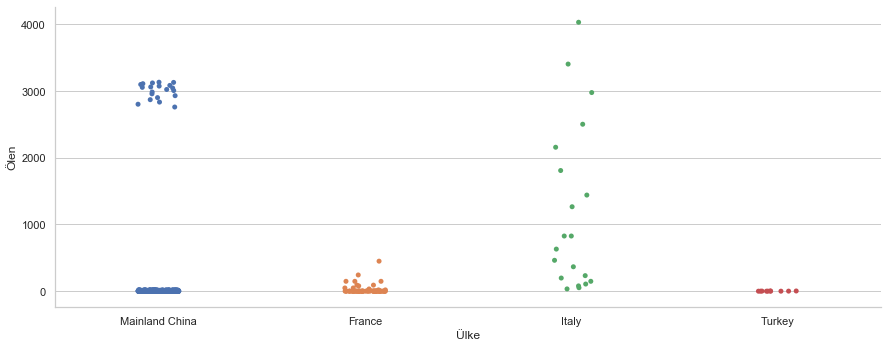

In [34]:
sns.catplot(x="Ülke",y="Bağımlı",data=df_ulkeler,aspect=2.5);
sns.catplot(x="Ülke",y="Ölen",data=df_ulkeler,aspect=2.5);

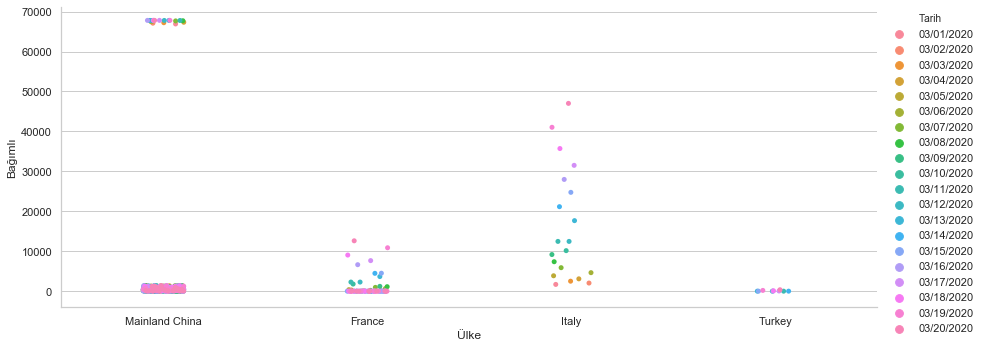

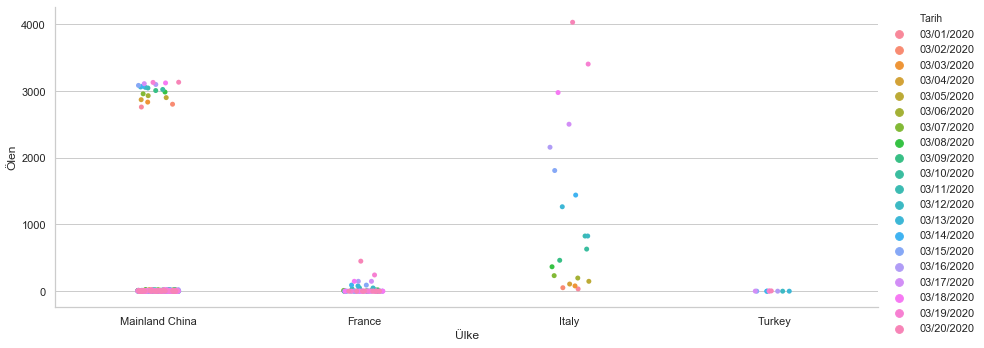

In [35]:
sns.catplot(x="Ülke",y="Bağımlı",hue="Tarih",data=df_ulkeler,aspect=2.5);
sns.catplot(x="Ülke",y="Ölen",hue="Tarih",data=df_ulkeler,aspect=2.5);

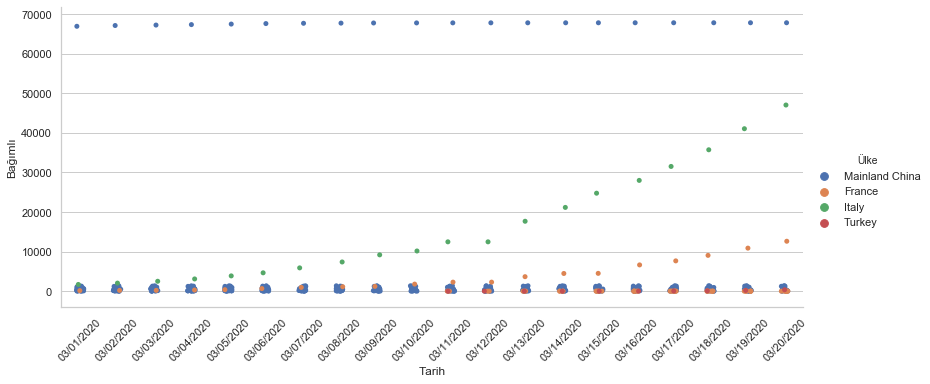

In [36]:
a=sns.catplot(x="Tarih",y="Bağımlı",hue="Ülke",data=df_ulkeler,aspect=2.3);
a.set_xticklabels(rotation=45);

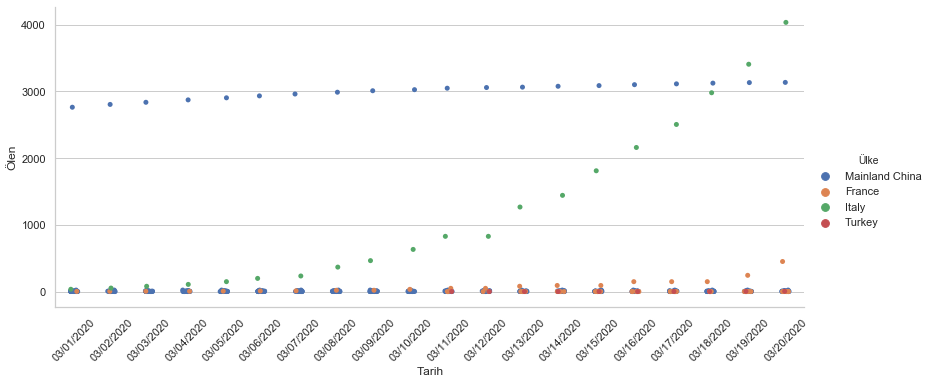

In [37]:
a=sns.catplot(x="Tarih",y="Ölen",hue="Ülke",data=df_ulkeler,aspect=2.3);
a.set_xticklabels(rotation=45);

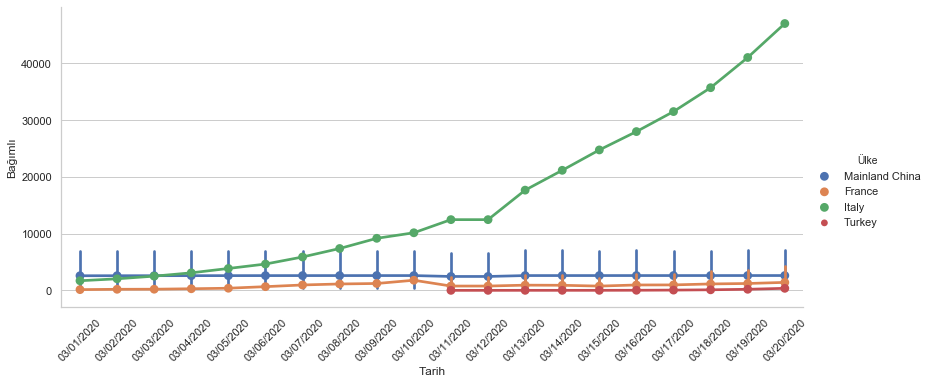

In [38]:
a=sns.catplot(x="Tarih",y="Bağımlı",hue="Ülke",data=df_ulkeler,aspect=2.3,kind="point");
a.set_xticklabels(rotation=45);

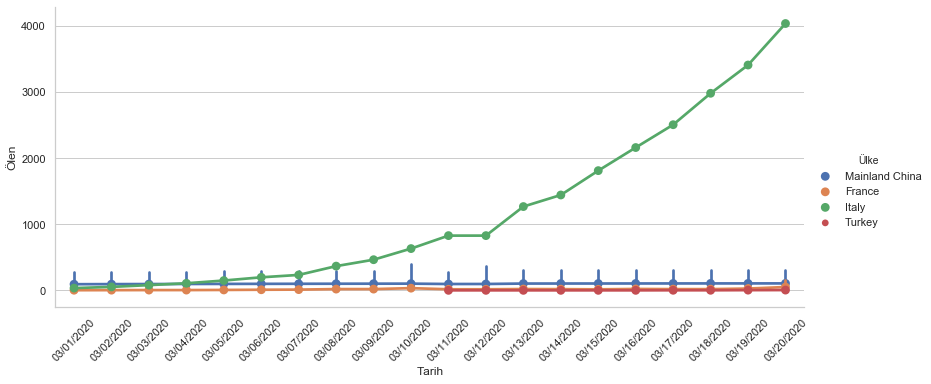

In [39]:
a=sns.catplot(x="Tarih",y="Ölen",hue="Ülke",data=df_ulkeler,aspect=2.3,kind="point");
a.set_xticklabels(rotation=45);

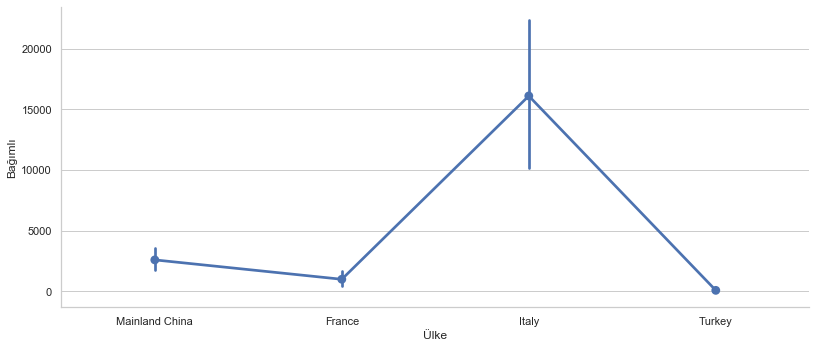

In [40]:
sns.catplot(x="Ülke",y="Bağımlı",data=df_ulkeler,aspect=2.3,kind="point");

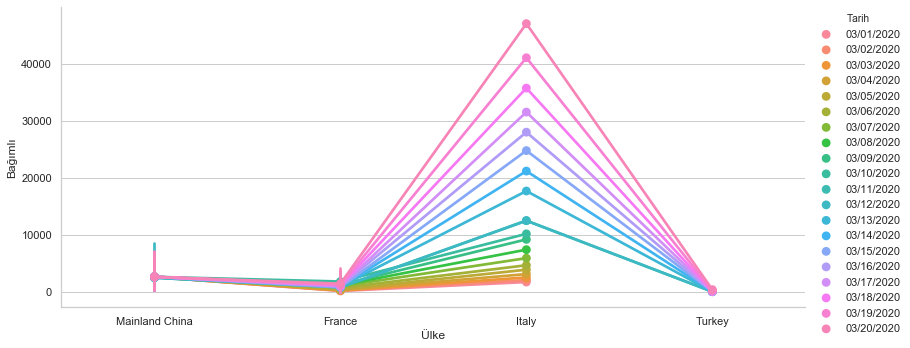

In [41]:
sns.catplot(x="Ülke",y="Bağımlı",hue="Tarih",data=df_ulkeler,aspect=2.3,kind="point");

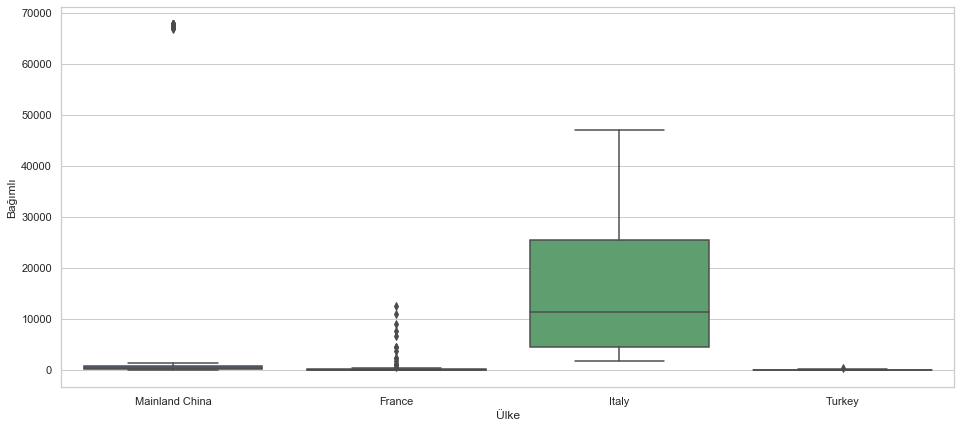

In [42]:
sns.boxplot(x="Ülke",y="Bağımlı",data=df_ulkeler)

[(0, 5000)]

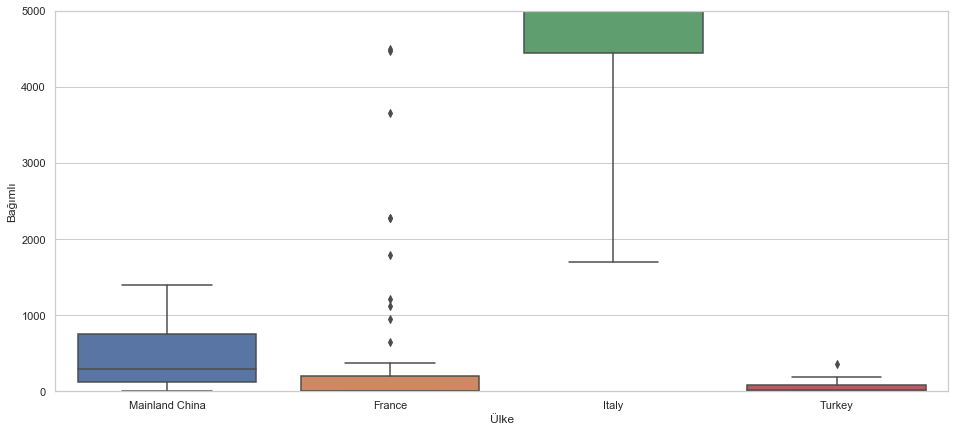

In [43]:
sns.boxplot(x="Ülke",y="Bağımlı",data=df_ulkeler).set(ylim=(0,5000))

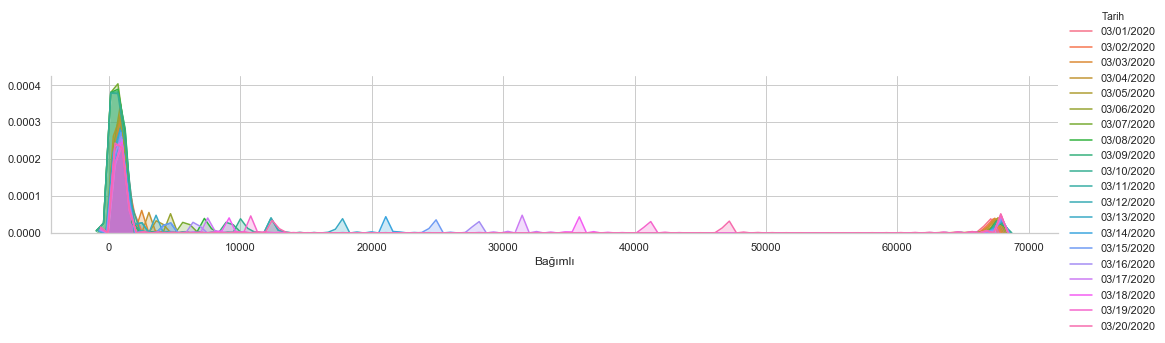

In [44]:
sns.FacetGrid(data=df_ulkeler,hue="Tarih",aspect=5).map(sns.kdeplot,"Bağımlı",shade=True).add_legend()

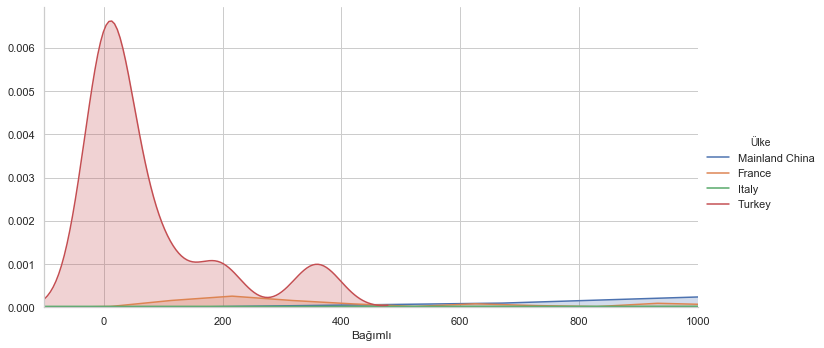

In [45]:
sns.FacetGrid(data=df_ulkeler,hue="Ülke",aspect=2,height=5,xlim=(-100,1000)).map(sns.kdeplot,"Bağımlı",shade=True).add_legend()

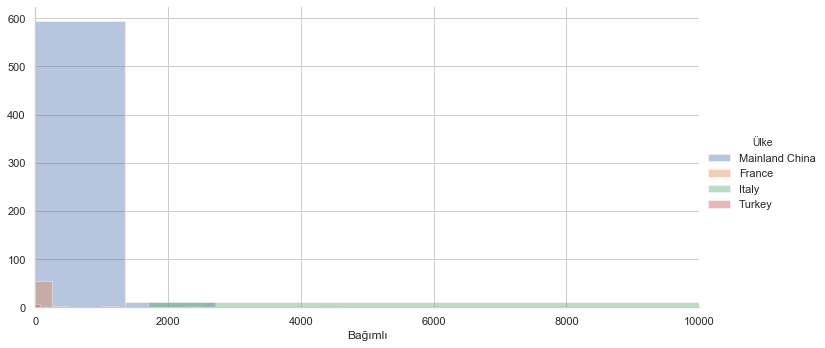

In [46]:
sns.FacetGrid(data=df_ulkeler,hue="Ülke",aspect=2,height=5,xlim=(0,10000)).map(sns.distplot,"Bağımlı",kde=False).add_legend()

In [47]:
df_sinir=df_ulkeler.groupby("Ülke").mean()

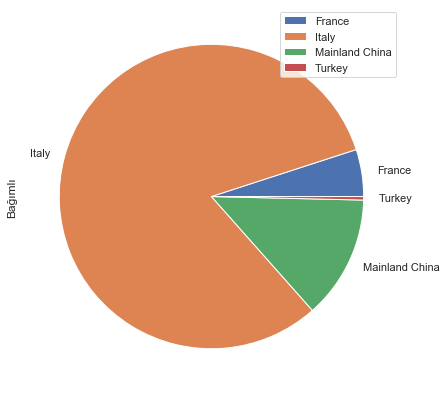

In [48]:
df_sinir.plot.pie(y="Bağımlı",figsize=(7,7))

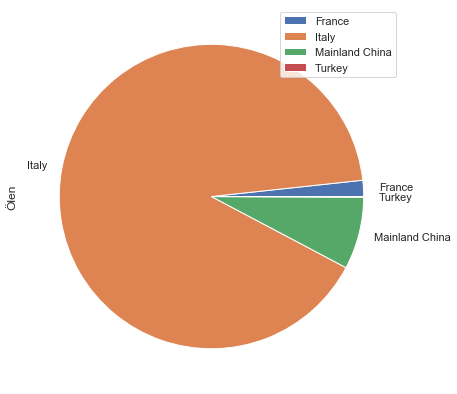

In [49]:
df_sinir.plot.pie(y="Ölen",figsize=(7,7))

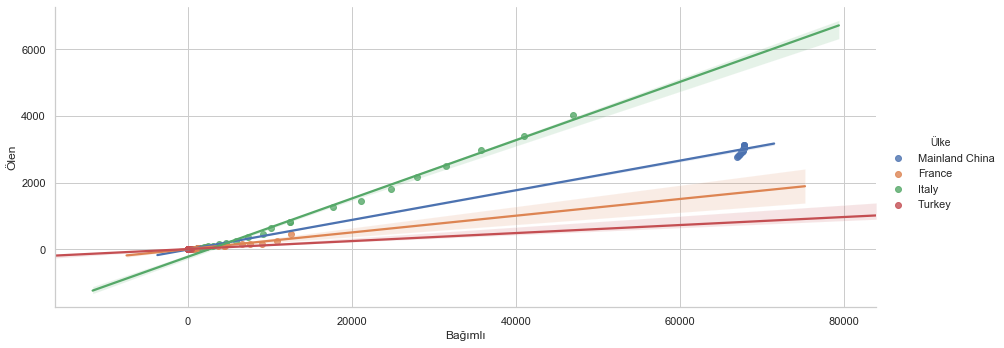

In [50]:
sns.lmplot(x="Bağımlı",y="Ölen",data=df_ulkeler,hue="Ülke",aspect=2.5)

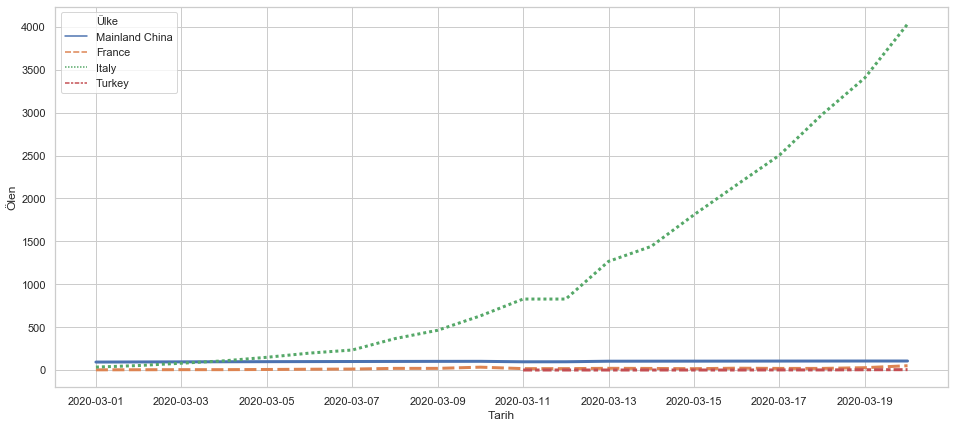

In [51]:
sns.lineplot(x=df_ulkeler.index,y=df_ulkeler["Ölen"],ci=None,hue=df_ulkeler["Ülke"],style=df_ulkeler["Ülke"],linewidth=3)

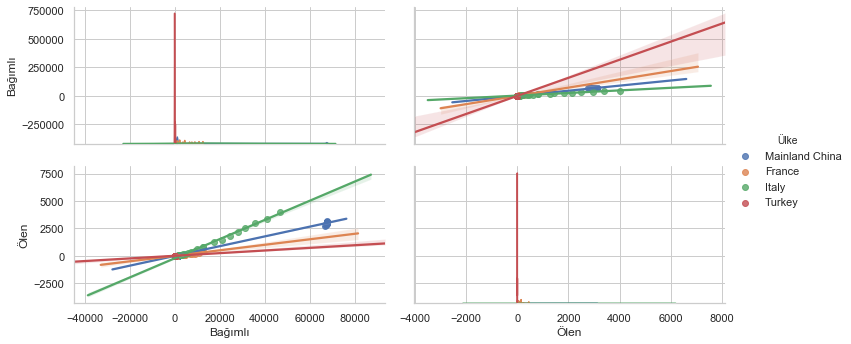

In [52]:
sns.pairplot(data=df_ulkeler,kind="reg",hue="Ülke",vars=["Bağımlı","Ölen"],aspect=2)

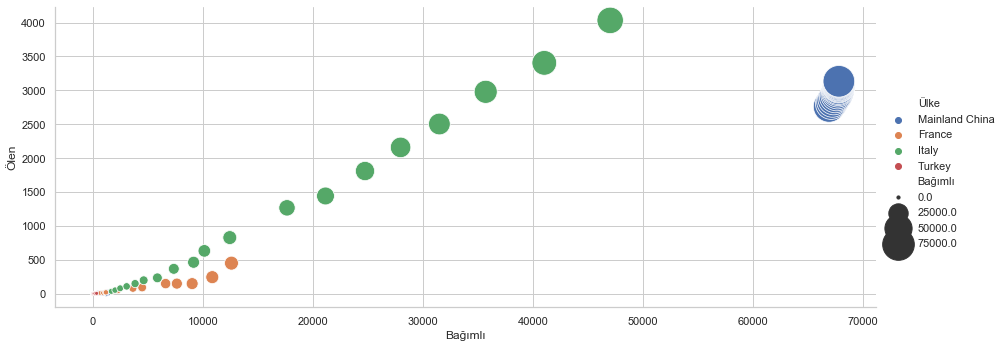

In [82]:
sns.relplot(data=df_ulkeler,x="Bağımlı",y="Ölen",aspect=2.5,height=5,size="Bağımlı",sizes=(10,1000),hue="Ülke")

In [83]:
df_ulkeler.head()

,Tarih,Şehir,Ülke,Bağımlı,Ölen,İyileşen
Tarih,,,,,,
2020-03-01,03/01/2020,Hubei,Mainland China,66907.0,2761.0,31536.0
2020-03-01,03/01/2020,Guangdong,Mainland China,1349.0,7.0,1016.0
2020-03-01,03/01/2020,Henan,Mainland China,1272.0,22.0,1198.0
2020-03-01,03/01/2020,Zhejiang,Mainland China,1205.0,1.0,1046.0
2020-03-01,03/01/2020,Hunan,Mainland China,1018.0,4.0,866.0


In [91]:
df_map=df_ulkeler.pivot_table(values="Bağımlı",index=df_ulkeler.index,columns="Ülke")

In [92]:
df_map

Ülke,France,Italy,Mainland China,Turkey
Tarih,,,,
2020-03-01,130.000000,1694.0,2575.032258,NaN
2020-03-02,191.000000,2036.0,2581.483871,NaN
2020-03-03,204.000000,2502.0,2585.516129,NaN
2020-03-04,285.000000,3089.0,2589.387097,NaN
2020-03-05,377.000000,3858.0,2594.258065,NaN
2020-03-06,653.000000,4636.0,2599.129032,NaN
2020-03-07,949.000000,5883.0,2601.677419,NaN
2020-03-08,1126.000000,7375.0,2603.193548,NaN
2020-03-09,1209.000000,9172.0,2604.354839,NaN


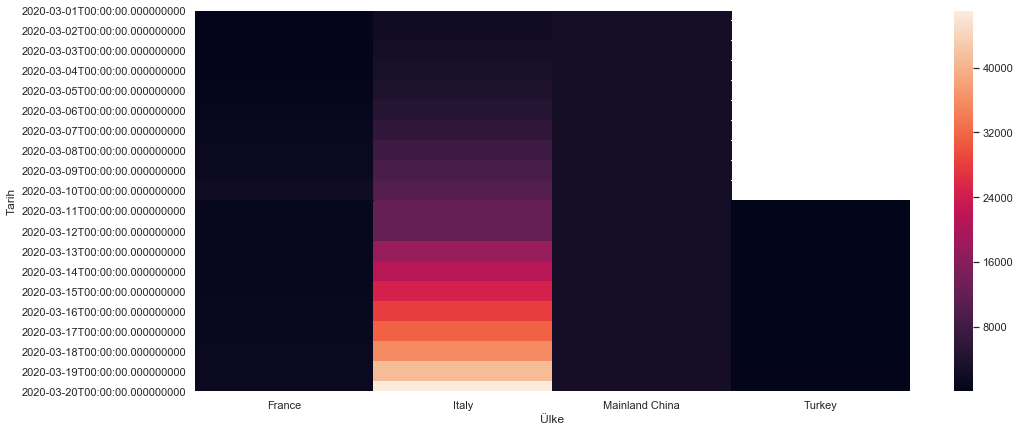

In [96]:
sns.heatmap(df_map)